---
# Point Anomalies  
#### (Global Outliers)
<img src="../img/pointan.png" width="400">

---
# Distance Based Clustering
# k-Means Algorithmn

Is a method of vector quantization, and aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean

K-means finds cluster centers by minimizing the sum of squared distances from each point to its assigned cluster. Points are assigned to the cluster whose center is closest.

After initial centers are chosen, two steps repeat until the cluster assignment no longer changes for any point (which is equivalent to the cluster centers no longer moving):

![](../img/kmeans-alg.png)

<img src="../img/ad8.png" width="800">

## Choosing k  
In k-means for anomaly detection we must choose a value for k in advance and the final results are sensitive to initialization and often terminates at a local optimum. This is still an active area of research and no definitive answers. In general, a large k probably decreases the error but increases the risk of overfitting.

- No observable target to predict.
- The elbow method
- Heuristic
K = maxArg(sqrt(n/2), 1)

## Use case
##### Wine dataset
The Wine data set is a multivariate data set introduced by M. Forina et al. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. [Info here ](https://pythonhosted.org/bob/temp/bob.db.wine/doc/index.html)

In [1]:
import pandas as pd
dataset = pd.read_csv('../datasets/wine_parvus.csv')

In [2]:
dataset.columns

Index(['Variety', 'Variety name', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [3]:
dataset.head()

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71
1,1,Babera,14.23,1.71,2.43,15.60,127.00,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.00
2,1,Babera,13.20,1.78,2.14,11.20,100.00,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.00
3,1,Babera,13.16,2.36,2.67,18.60,101.00,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.00
4,1,Babera,14.37,1.95,2.50,16.80,113.00,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.00


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [6]:
X = dataset[['Alcohol','Color intensity']]

In [7]:
X.describe()

,Alcohol,Color intensity
count,180.000000,180.000000
mean,13.010056,5.071889
std,0.849337,2.381056
min,11.030000,0.800000
25%,12.355000,3.200000
50%,13.050000,4.690000
75%,13.682500,6.212500
max,16.200000,13.000000


## Standard Scaler

<img src="../img/standard.png" width="400">

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Prior number of Clusters**

In [9]:
K = int(np.sqrt(len(dataset) / 2.0))

In [10]:
print('Number of Clusters K: {}'.format(K))

Number of Clusters K: 9


**Importing KMeans Class **

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters = K)

fit_predict to fit model and obtain cluster labels

In [13]:
clusters = model.fit_predict(X_scaled)

In [14]:
clusters

array([2, 0, 6, 6, 5, 6, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0,
       6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 5, 6, 0, 6, 6, 6, 6, 6, 0, 0, 6, 0,
       6, 6, 0, 0, 0, 0, 5, 7, 0, 5, 0, 0, 0, 0, 6, 5, 3, 3, 1, 6, 1, 3,
       1, 6, 1, 6, 3, 3, 6, 6, 6, 4, 4, 6, 4, 3, 3, 4, 3, 4, 6, 4, 3, 3,
       4, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 1, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 1, 3, 3, 4, 4, 3, 4, 3, 4, 6,
       1, 1, 1, 1, 7, 3, 1, 6, 1, 6, 6, 6, 6, 7, 6, 0, 7, 5, 2, 5, 2, 7,
       2, 7, 7, 5, 7, 2, 2, 7, 0, 1, 6, 5, 0, 2, 2, 5, 5, 1, 2, 5, 5, 5,
       2, 2, 5, 8], dtype=int32)

Adding the labels to the dataset

In [15]:
dataset['cluster_id'] = clusters

In [16]:
dataset.groupby('cluster_id').count()['Variety'].reset_index()

,cluster_id,Variety
0,0,32
1,1,14
2,2,11
3,3,30
4,4,28
5,5,19
6,6,36
7,7,9
8,8,1


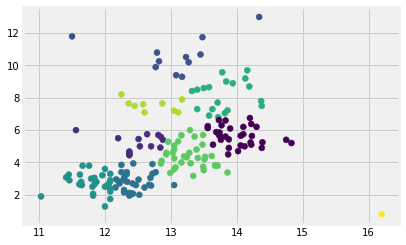

In [17]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=clusters)

**Making groups**

In [18]:
groups = dataset.groupby(['cluster_id','Variety']).count()['Variety name'].reset_index()
groups.columns = ['cluster_id','Variety','count']

In [19]:
groups.head()

,cluster_id,Variety,count
0,0,1,29
1,0,3,3
2,1,2,6
3,1,3,8
4,2,1,1
5,2,3,10
6,3,2,29
7,3,3,1
8,4,2,28
9,5,1,9


In [20]:
anomalies = groups[groups['count'] == 1]

In [21]:
anomalies

,cluster_id,Variety,count
4,2,1,1
7,3,3,1
14,7,1,1
16,8,3,1


In [22]:
dataset['Variety'].unique()

array([1, 2, 3])

In [23]:
g1 = anomalies.iloc[:,0].values
g2 = anomalies.iloc[:,1].values

In [24]:
anomalies_df = pd.DataFrame()
for i, j in zip(g1, g2):
    anomalies_df = anomalies_df.append(dataset[
        (dataset['cluster_id'] == i) & (dataset['Variety'] == j)])

In [25]:
anomalies_df

,Variety,Variety name,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,cluster_id
0,1,Babera,11.50,2.01,2.46,17.04,106.34,2.84,2.98,0.29,1.90,11.80,1.06,3.16,1115.71,2
137,3,Grignolino,12.25,4.72,2.54,21.00,89.00,1.38,0.47,0.53,0.80,3.85,0.75,1.27,720.00,3
51,1,Babera,13.05,1.73,2.04,12.40,92.00,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150.00,7
179,3,Grignolino,16.20,3.33,2.44,21.42,99.31,1.68,0.78,0.45,1.15,0.80,0.68,1.68,629.90,8


In [26]:
dataset['anomaly'] = [1 if i in anomalies_df.index else 0 for i in dataset.index]   

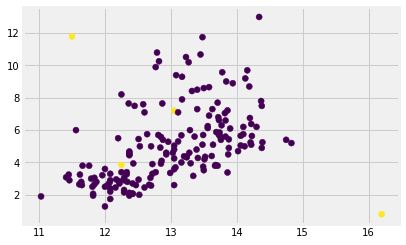

In [27]:
plt.scatter(dataset['Alcohol'], dataset['Color intensity'], c=dataset['anomaly'])

## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
scores = []
for K in range(2, 30):
    model = KMeans(n_clusters = K)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

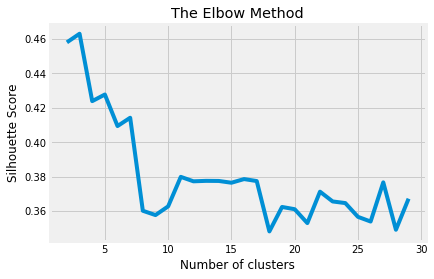

In [30]:
plt.plot(range(2, 30), scores)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()